In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
if 'Personality' not in test.columns:
    test['Personality'] = 'Introvert'
data = pd.concat([train,test],axis = 0)
data= data.set_index('id')

In [4]:
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
24694,3.0,No,5.0,5.0,No,9.0,6.0,Introvert
24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0,Introvert
24696,2.0,No,4.0,3.0,No,9.0,7.0,Introvert


In [5]:
train

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [6]:
train.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
5242,5242,1.0,No,9.0,5.0,No,6.0,NaN,Extrovert
216,216,5.0,Yes,1.0,2.0,NaN,2.0,1.0,Introvert
8358,8358,1.0,No,7.0,5.0,No,15.0,3.0,Extrovert
17969,17969,4.0,No,6.0,4.0,No,12.0,8.0,Extrovert
12586,12586,4.0,Yes,2.0,0.0,NaN,1.0,0.0,Introvert


In [7]:
train.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
data.isna().sum()

Time_spent_Alone             1615
Stage_fear                   2491
Social_event_attendance      1577
Going_outside                1932
Drained_after_socializing    1581
Friends_circle_size          1404
Post_frequency               1672
Personality                     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           23084 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   Personality                24699 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [10]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,23084.000000,23122.000000,22767.000000,23295.000000,23027.000000
mean,3.132559,5.270824,4.042693,7.999657,4.993833
std,2.999230,2.754491,2.058194,4.215721,2.876184
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
data.duplicated().sum()

0

<Axes: ylabel='count'>

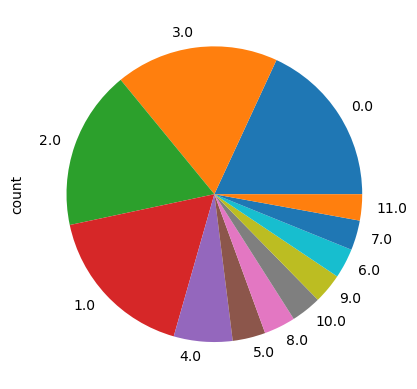

In [12]:
data['Time_spent_Alone'].value_counts().plot(kind = 'pie')

<Axes: xlabel='Social_event_attendance'>

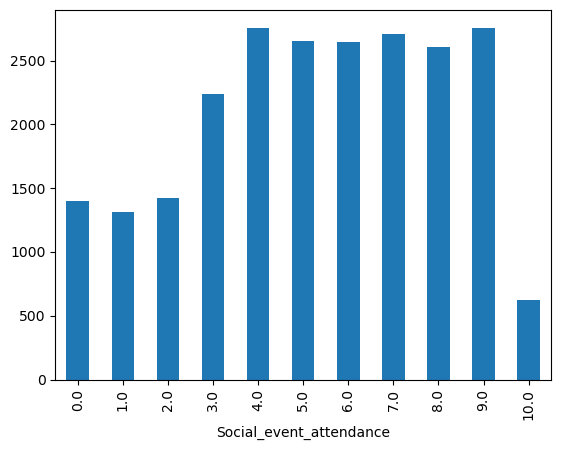

In [13]:
data['Social_event_attendance'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Going_outside'>

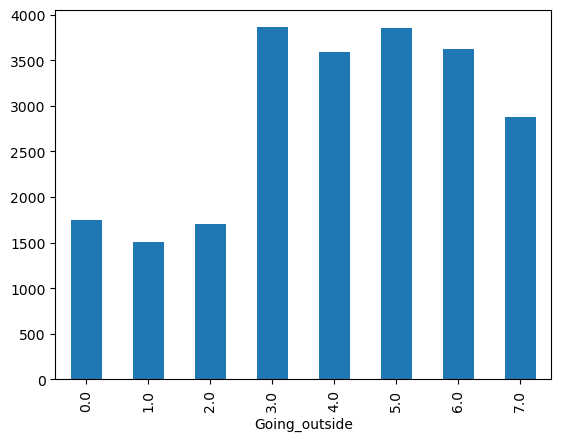

In [14]:
data['Going_outside'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Friends_circle_size'>

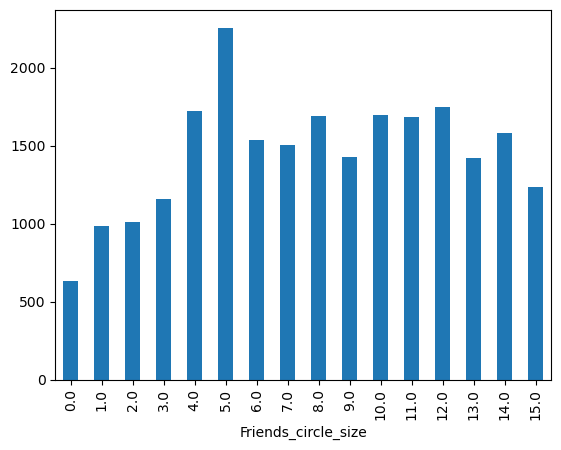

In [15]:
data['Friends_circle_size'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Drained_after_socializing'>

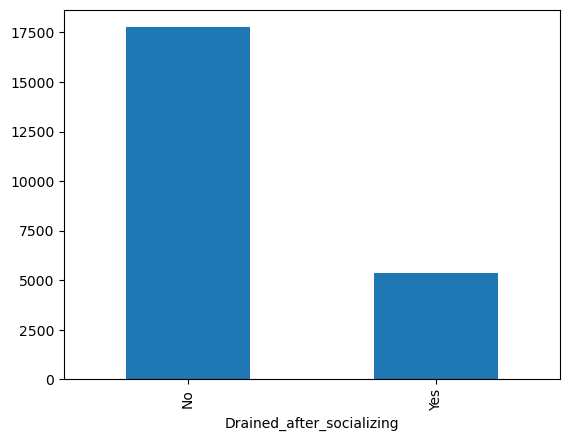

In [16]:
data['Drained_after_socializing'].value_counts().plot(kind ='bar')

<Axes: xlabel='Stage_fear'>

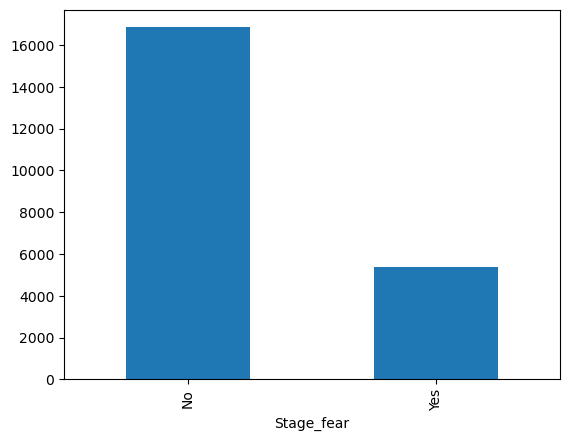

In [17]:
data['Stage_fear'].value_counts().plot(kind ='bar')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [19]:
train.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [20]:
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [21]:
train.isna().mean()*100

id                            0.000000
Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64

In [22]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].fillna(data['Time_spent_Alone'].mean())
data['Stage_fear'] = data['Stage_fear'].fillna(data['Stage_fear'].mode()[0])
data['Social_event_attendance'] = data['Social_event_attendance'].fillna(data['Social_event_attendance'].mean())
data['Going_outside'] = data['Going_outside'].fillna(data['Going_outside'].mean())
data['Drained_after_socializing'] = data['Drained_after_socializing'].fillna(data['Drained_after_socializing'].mode()[0])
data['Friends_circle_size'] = data['Friends_circle_size'].fillna(data['Friends_circle_size'].mean())
data['Post_frequency'] = data['Post_frequency'].fillna(data['Post_frequency'].mean())

In [23]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

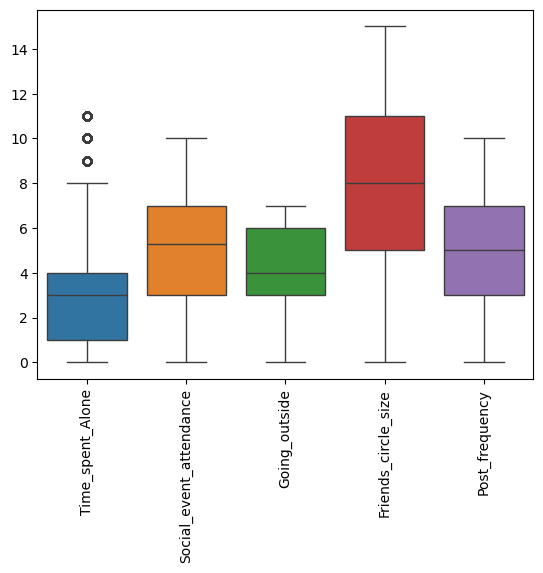

In [24]:
sns.boxplot(data)
plt.xticks(rotation = 90)
plt.show()

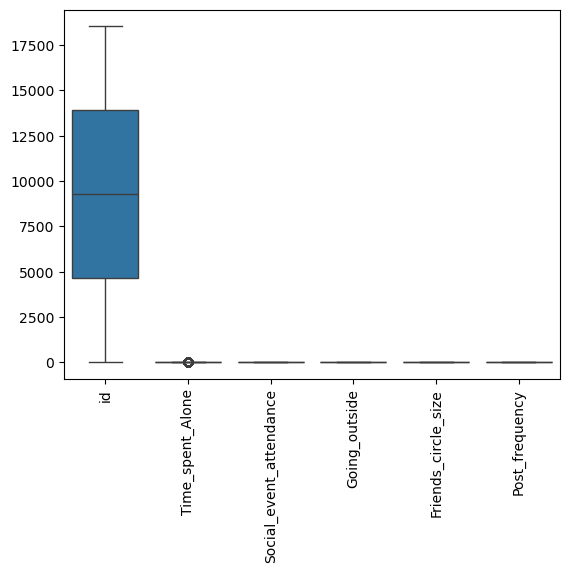

In [25]:
sns.boxplot(train)
plt.xticks(rotation = 90)
plt.show()

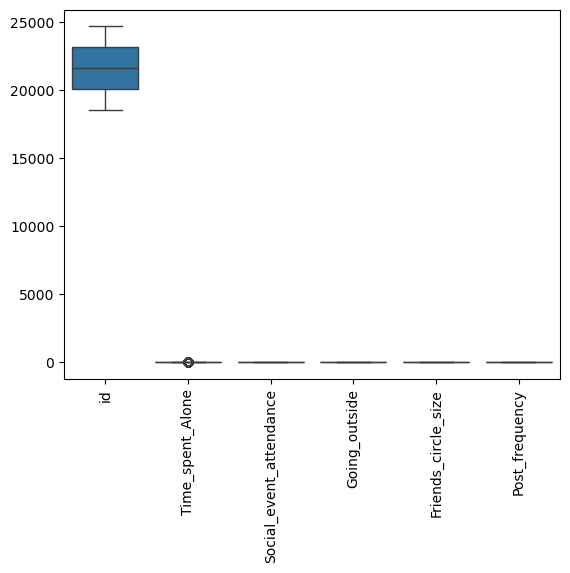

In [26]:
sns.boxplot(test)
plt.xticks(rotation = 90)
plt.show()

<b>UNIVARIATE ANALYSIS

C:\Users\agarw\AppData\Local\Temp\ipykernel_11788\858915224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Time_spent_Alone'])


<Axes: xlabel='Time_spent_Alone', ylabel='Density'>

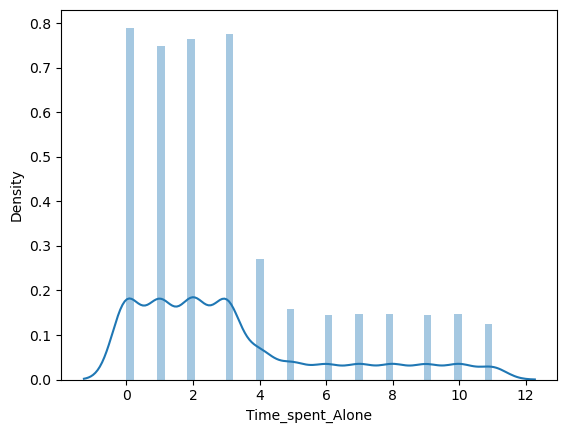

In [27]:
sns.distplot(train['Time_spent_Alone'])

C:\Users\agarw\AppData\Local\Temp\ipykernel_11788\3182150622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Social_event_attendance'])


<Axes: xlabel='Social_event_attendance', ylabel='Density'>

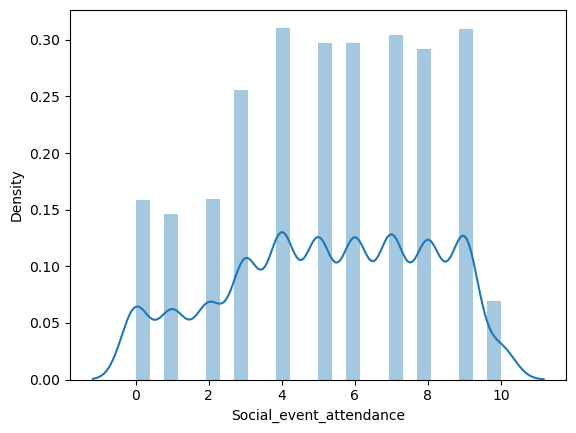

In [28]:
sns.distplot(train['Social_event_attendance'])

C:\Users\agarw\AppData\Local\Temp\ipykernel_11788\1470220394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Going_outside'])


<Axes: xlabel='Going_outside', ylabel='Density'>

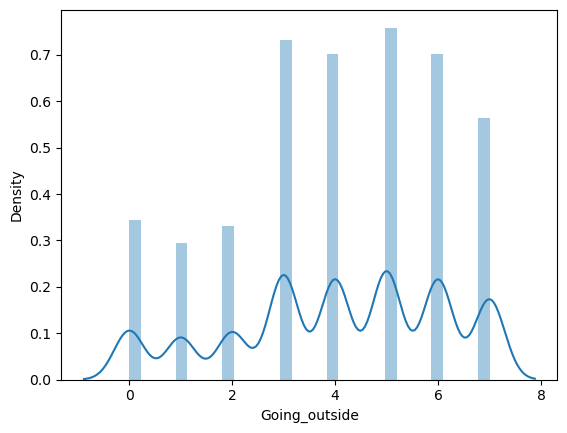

In [29]:
sns.distplot(train['Going_outside'])

C:\Users\agarw\AppData\Local\Temp\ipykernel_11788\4260382556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Friends_circle_size'])


<Axes: xlabel='Friends_circle_size', ylabel='Density'>

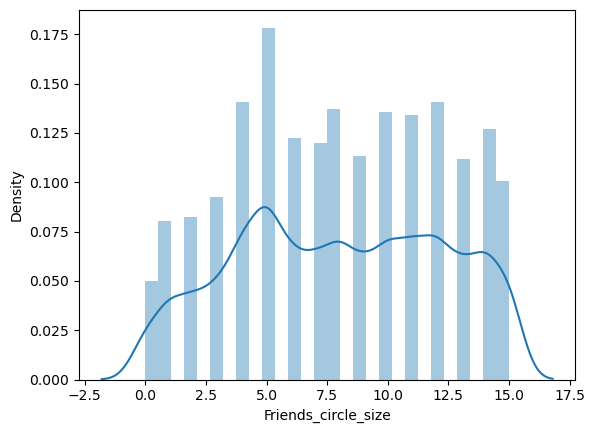

In [30]:
sns.distplot(train['Friends_circle_size'])

C:\Users\agarw\AppData\Local\Temp\ipykernel_11788\2215648609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Post_frequency'])


<Axes: xlabel='Post_frequency', ylabel='Density'>

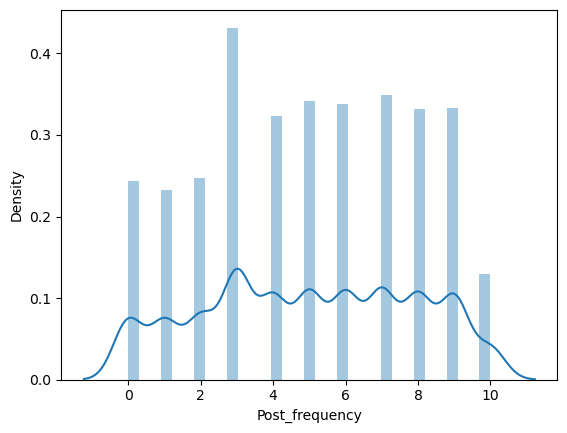

In [31]:
sns.distplot(train['Post_frequency'])

<Axes: ylabel='Stage_fear'>

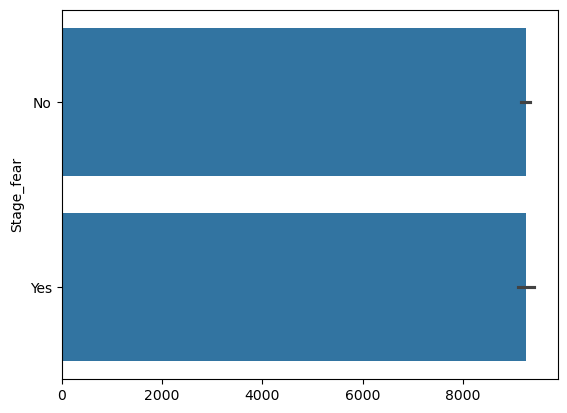

In [32]:
sns.barplot(train['Stage_fear'])

<Axes: ylabel='Drained_after_socializing'>

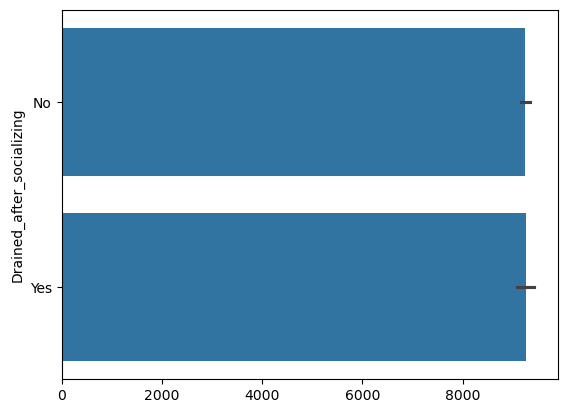

In [33]:
sns.barplot(train['Drained_after_socializing'])

In [35]:
training_data = data[0:len(train)].copy()
testing_data = data[len(train):].copy()

In [36]:
training_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.000000,No,6.0,4.0,No,15.0,5.000000,Extrovert
1,1.000000,No,7.0,3.0,No,10.0,8.000000,Extrovert
2,6.000000,Yes,1.0,0.0,No,3.0,0.000000,Introvert
3,3.000000,No,7.0,3.0,No,11.0,5.000000,Extrovert
4,1.000000,No,4.0,4.0,No,13.0,4.993833,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.000000,No,7.0,3.0,No,9.0,7.000000,Extrovert
18520,1.000000,No,6.0,7.0,No,6.0,5.000000,Extrovert
18521,7.000000,Yes,1.0,1.0,Yes,1.0,4.993833,Introvert


In [39]:
testing_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
18524,3.000000,0,7.0,4.0,0,6.0,4.993833
18525,3.132559,1,0.0,0.0,1,5.0,1.000000
18526,3.000000,0,5.0,6.0,0,15.0,9.000000
18527,3.000000,0,4.0,4.0,0,5.0,6.000000
18528,9.000000,1,1.0,2.0,1,1.0,1.000000
...,...,...,...,...,...,...,...
24694,3.000000,0,5.0,5.0,0,9.0,6.000000
24695,8.000000,1,2.0,1.0,1,0.0,0.000000
24696,2.000000,0,4.0,3.0,0,9.0,7.000000


In [40]:
x = training_data[['Time_spent_Alone','Stage_fear','Social_event_attendance','Going_outside', 'Drained_after_socializing']]

In [41]:
xx = testing_data[['Time_spent_Alone','Stage_fear','Social_event_attendance','Going_outside', 'Drained_after_socializing']]

In [42]:
y = training_data['Personality']

In [43]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
id,,,,,
0,0.000000,0,6.0,4.0,0
1,1.000000,0,7.0,3.0,0
2,6.000000,1,1.0,0.0,0
3,3.000000,0,7.0,3.0,0
4,1.000000,0,4.0,4.0,0
...,...,...,...,...,...
18519,3.000000,0,7.0,3.0,0
18520,1.000000,0,6.0,7.0,0
18521,7.000000,1,1.0,1.0,1


In [44]:
xx

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
id,,,,,
18524,3.000000,0,7.0,4.0,0
18525,3.132559,1,0.0,0.0,1
18526,3.000000,0,5.0,6.0,0
18527,3.000000,0,4.0,4.0,0
18528,9.000000,1,1.0,2.0,1
...,...,...,...,...,...
24694,3.000000,0,5.0,5.0,0
24695,8.000000,1,2.0,1.0,1
24696,2.000000,0,4.0,3.0,0


In [45]:
y

id
0        1
1        1
2        0
3        1
4        1
        ..
18519    1
18520    1
18521    0
18522    0
18523    1
Name: Personality, Length: 18524, dtype: int64

In [37]:
training_data['Stage_fear'] = training_data['Stage_fear'].apply(lambda x: 0 if x == 'No'  else 1)
training_data['Drained_after_socializing'] = training_data['Drained_after_socializing'].apply(lambda x: 0 if x == 'No'  else 1)
testing_data['Stage_fear'] = testing_data['Stage_fear'].apply(lambda x: 0 if x == 'No'  else 1)
testing_data['Drained_after_socializing'] = testing_data['Drained_after_socializing'].apply(lambda x: 0 if x == 'No'  else 1)
training_data['Personality'] = training_data['Personality'].apply(lambda x: 0 if x == 'Introvert' else 1)
testing_data = testing_data.drop(columns = 'Personality',axis = 1)

In [38]:
training_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.000000,0,6.0,4.0,0,15.0,5.000000,1
1,1.000000,0,7.0,3.0,0,10.0,8.000000,1
2,6.000000,1,1.0,0.0,0,3.0,0.000000,0
3,3.000000,0,7.0,3.0,0,11.0,5.000000,1
4,1.000000,0,4.0,4.0,0,13.0,4.993833,1
...,...,...,...,...,...,...,...,...
18519,3.000000,0,7.0,3.0,0,9.0,7.000000,1
18520,1.000000,0,6.0,7.0,0,6.0,5.000000,1
18521,7.000000,1,1.0,1.0,1,1.0,4.993833,0


In [46]:
training_data['Drained_after_socializing'].value_counts()

Drained_after_socializing
0    14462
1     4062
Name: count, dtype: int64

In [47]:
training_data['Stage_fear'].value_counts()

Stage_fear
0    14502
1     4022
Name: count, dtype: int64

In [48]:
testing_data['Stage_fear'].value_counts()

Stage_fear
0    4834
1    1341
Name: count, dtype: int64

In [49]:
y.value_counts()

Personality
1    13699
0     4825
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size = 0.2,random_state = 42)

In [51]:
x_train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
id,,,,,
2716,4.0,1,5.270824,0.0,1
11493,0.0,0,9.000000,3.0,0
9409,10.0,1,3.000000,3.0,1
14196,3.0,0,7.000000,6.0,0
6531,0.0,0,9.000000,3.0,0
...,...,...,...,...,...
2652,3.0,0,9.000000,6.0,0
13740,0.0,0,9.000000,5.0,0
7771,7.0,1,3.000000,1.0,1


In [52]:
y_test

id
3095     1
14589    0
10565    1
17053    1
9145     1
        ..
4189     1
11353    1
2755     1
910      0
7120     1
Name: Personality, Length: 3705, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

print(y_resampled.value_counts())  # Balanced now


Personality
0    10959
1    10959
Name: count, dtype: int64


In [54]:
y_resampled.value_counts()

Personality
0    10959
1    10959
Name: count, dtype: int64

In [55]:
X_resampled['Time_spent_Alone'].value_counts()

Time_spent_Alone
0.000000     2578
3.000000     2570
2.000000     2493
1.000000     2428
4.000000     1618
             ... 
0.257119        1
3.330017        1
10.431528       1
3.984952        1
3.211714        1
Name: count, Length: 388, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def performance(predictions):
    print("Accuracy: {}".format(accuracy_score(y_test,predictions)))
    print("Precision: {}".format(precision_score(y_test,predictions)))
    print("Recall: {}".format(recall_score(y_test,predictions)))
    print("F1 Score: {}".format(f1_score(y_test,predictions)))
    print("Classification Report: {}".format(classification_report(y_test,predictions)))

In [57]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [58]:
model1.fit(X_resampled,y_resampled)
y_pred = model1.predict(x_test)

In [59]:
performance(y_pred)

Accuracy: 0.9651821862348178
Precision: 0.9735219441421835
Recall: 0.9795620437956204
F1 Score: 0.9765326541750046
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.97      0.97      0.97      3705



In [60]:
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn.ensemble import RandomForestClassifier
param_grid3 = {
    "max_features" : [1,2,3,4,5],
    "bootstrap" : [True],
    "n_estimators" :[64,128]
}
rando = RandomForestClassifier()
model2 = GridSearchCV(rando,param_grid3,cv = 5, verbose = 2)
model2.fit(X_resampled, y_resampled)
y_pred1 = model2.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....bootstrap=True, max_features=1, n_estimators=64; total time=   0.7s
[CV] END ....bootstrap=True, max_features=1, n_estimators=64; total time=   0.7s
[CV] END ....bootstrap=True, max_features=1, n_estimators=64; total time=   0.8s
[CV] END ....bootstrap=True, max_features=1, n_estimators=64; total time=   0.7s
[CV] END ....bootstrap=True, max_features=1, n_estimators=64; total time=   0.8s
[CV] END ...bootstrap=True, max_features=1, n_estimators=128; total time=   1.6s
[CV] END ...bootstrap=True, max_features=1, n_estimators=128; total time=   1.5s
[CV] END ...bootstrap=True, max_features=1, n_estimators=128; total time=   1.6s
[CV] END ...bootstrap=True, max_features=1, n_estimators=128; total time=   1.6s
[CV] END ...bootstrap=True, max_features=1, n_estimators=128; total time=   1.6s
[CV] END ....bootstrap=True, max_features=2, n_estimators=64; total time=   0.9s
[CV] END ....bootstrap=True, max_features=2, n_e

In [71]:
performance(y_pred1)

Accuracy: 0.9622132253711201
Precision: 0.9713560551124003
Recall: 0.9777372262773723
F1 Score: 0.9745361949799928
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.97      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [69]:
from sklearn.svm import SVC
svm = SVC()
param_grido = {
    "C" : [0.1,1],
    "kernel" : ["linear","rbf"]
}
model3 = GridSearchCV(svm, param_grido, cv = 5,  verbose=2)
model3.fit(X_resampled,y_resampled)
y_pred2 = model3.predict(x_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

In [68]:
performance(y_pred2)

Accuracy: 0.9635627530364372
Precision: 0.9734641948382406
Recall: 0.9773722627737226
F1 Score: 0.9754143143325441
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [61]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"],
}
model4 = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
model4.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [62]:
y_pred3 = model4.predict(x_test)

In [63]:
performance(y_pred3)

Accuracy: 0.9630229419703104
Precision: 0.9717288872779992
Recall: 0.9784671532846715
F1 Score: 0.9750863793416985
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [64]:
from sklearn.tree import DecisionTreeClassifier
param_grid3 = {
    "max_depth" : [None,10,20,30],
    "criterion" : ["gini","entropy"],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4],
    "splitter" : ["best","random"]
}
model5 = GridSearchCV(DecisionTreeClassifier(),param_grid3,cv = 5)
model5.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [65]:
y_pred4 = model5.predict(x_test)

In [66]:
performance(y_pred4)

Accuracy: 0.9614035087719298
Precision: 0.9703006157189424
Recall: 0.9777372262773723
F1 Score: 0.9740047264133794
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.97      2740

    accuracy                           0.96      3705
   macro avg       0.95      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [73]:
yl_pred = model1.predict(xx)
yl_pred_labels = pd.Series(yl_pred).map({0: "Introvert", 1: "Extrovert"})
final = pd.DataFrame()
final['id'] = testing_data.index
final['Personality'] = yl_pred_labels
final.to_csv('Output.csv',index = False)